# <u>Introduction </u>

The popularity in Artificial Intelligence has risen drastically in the past decade, with a particular focus on two specific concepts Machine Learning and Deep Learning. The popularity of Deep Learning in particular has increased due to the abundance of data and computational power, therefore allowing the development of more accurate models using vast amounts of data. 

A key area of the application and use of Deep Learning involves Neural Networks. They are a set of algorithms loosely modeled on the human brain. They emulate how the interconnected cells function within the brain allowing them to be trained to learn and recognise patterns in a similar way to the human brain. More specifically Neural networks can be used for a variety of tasks, including; classification, clustering, and predictive regression analysis.

Typically a universal workflow is followed to ensure the machine-learning problem can be solved. The aim of this project is to select a suitable dataset and build a Neural Network model following the steps from the Universal workflow presented by Chollet (2021) in Deep Learning with Python.

### <u>Step 1: Defining the problem and assembling a dataset </u>


The problem represents a binary classification of movie reviews to either positive or negative based on the text content of the reviews. The input for the neural network is the text content of the movie review which will be used to predict the output as a binary class - either positive or negative. 

The dataset selected for use was the IMDB Dataset which contains 50,000 polarised reviews split into training and testing sets, each containing 25,000 reviews. The training set is used to train the Neural Network, while the testing set is used to test the Neural Network's performance on unseen data.

Importantly the IMDB dataset had an equal 50% split between positive and negative reviews ensuring a balance between classes. If a dataset has a class imbalance this can result in the trained algorithm ignoring the classification of smaller classes while focusing on classifying the larger classes more accurately. 

In [ ]:
#Importing relevant Libraries and Dataset 
from tensorflow.keras.datasets import imdb
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import gc 

In [ ]:
# Loading in Dataset and splitting into training and testing - 
# The reviews are limited to the top 10,000 most frequent words  
((train_reviews, train_labels), (test_reviews, test_labels)) = imdb.load_data(num_words=10000)

In [ ]:
#Printing size, shape of training and testing data
print('Tensor Shape')
print('================', '\n')
print('Training reviews: {}'.format(train_reviews.shape))
print('Training labels: {}'.format(train_labels.shape), '\n')
print('Test reviews: {}'.format(test_reviews.shape))
print('Test labels: {}'.format(test_labels.shape))

Tensor Shape

Training reviews: (25000,)
Training labels: (25000,) 

Test reviews: (25000,)
Test labels: (25000,)


# <u>Methodology </u>

Prior to training, validating and testing the model various decisions had to made regarding the following; measure of success, the evaluation protocol, and how to prepare the data. Selecting the appropriate methodology for preparing and evaluating  the model typically depends on the size, nature, and type of the dataset. 

### <u>Step 2: Choosing a measure of Success</u>

In the case of the IMDB dataset, <b>accuracy</b> is a suitable measure of success as illustrated below by the balanced classes in both training and test datasets. Moreover, accuracy works well as a measure of success for balanced classification problems where every class is equally likely.

In [ ]:
#Checking number of data points in each class 
print('Datapoints in each Class')
print('===========================', '\n')
print('Training Negative Reviews = {}'.format(list(train_labels).count(0)))
print('Training Positive Reviews = {}'.format(list(train_labels).count(1)), '\n')
print('Testing Negative Reviews = {}'.format(list(test_labels).count(0)))
print('Testing Positive Reviews = {}'.format(list(test_labels).count(1)))

Datapoints in each Class

Training Negative Reviews = 12500
Training Positive Reviews = 12500 

Testing Negative Reviews = 12500
Testing Positive Reviews = 12500


### <u>Step 3: Deciding on a Evaluation Protocol</u>

Selecting the appropriate evaluation protocol is important to help validate the progress of the training of the Neural Network, and allows the potential for tuning and optimising hyperparameters. Due to the large amount of data within the training set (25,000 points) using a <b>hold-out validation set</b> is suitable. 

### <u>Step 4: Preparing your Data </u>

Data preprocessing is a crucial step when creating any Deep Learning model. The process involves checking for missing values, cleaning, and preparing the raw data to ensure the data is in a suitable form to input into the model. The IMDB dataset from Keras has already been cleaned and contains no missing values.  

The Neural Network requires the input to be formatted as tensors and not a list of integers. This can be achieved by one-hot encoding the lists of integers into 10,000-dimensional vectors containing 0's and 1's with each index corresponding to a word. An index with the value 1 represents a word that is present in the review, while an index with 0 denotes a word that is not present in the review.  



In [ ]:
def vectorise_list(input_lists,dimensions):
    num_samples = len(input_lists)

    #create empty vector with size =(num of samples, num of words)
    vectorised_list = np.zeros((num_samples, dimensions))
    
    #Adapted from Lectures and Deep Learning with Python Book 
    for i, input_list in enumerate(input_lists):
        vectorised_list[i,input_list] = 1.
    return vectorised_list


#One-hot encode the reviews 
x_train = vectorise_list(train_reviews, dimensions=10000)
x_test = vectorise_list(test_reviews, dimensions=10000)

#Convert the labels to floating point tensors 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#Further Split Training Data into Validation as we are using Hold-out Validation method 
x_validation = x_train[:10000]
x_train_split = x_train[10000:]

y_validation = y_train[:10000]
y_train_split = y_train[10000:]

### <u>Step 5: Developing a model that does better than the baseline </u>

The baseline in the case of the IMDB dataset would be an accuracy of 50% as you could develop a model that just predicts a review to be positive or negative every time and still acheive 50% accuracy.

The appropriate loss function and last-layer activation were chosen in accordance with the table provided in Deep Learning with Python, which is illustrated below. As the problem type is a binary classification,  therefore the following loss function and last-layer activation were chosen; <b>loss function = binary_crossentropy</b> and the <b> last-layer activation = sigmoid</b>.


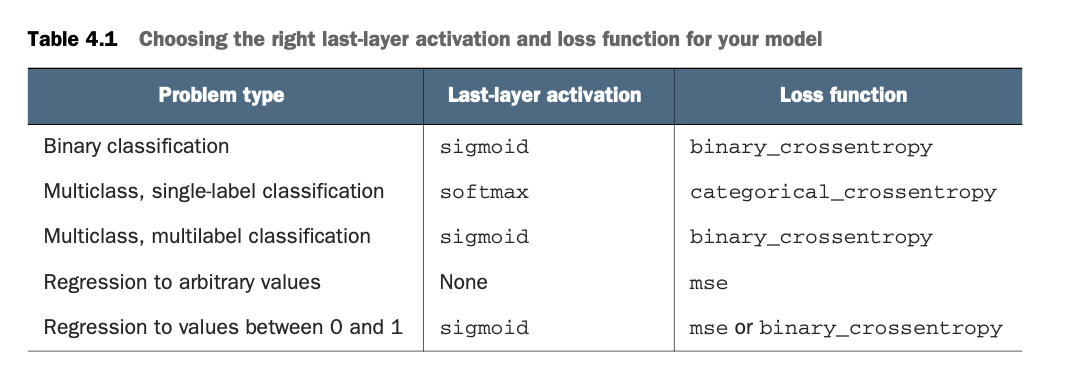

#### Code Used for creating and plotting models

In [ ]:
from keras import models, layers

def create_model(num_of_layers:int, l1_units:int, mid_layer_units=1, final_layer_units=1):
    
    assert num_of_layers < 5 
    
    if num_of_layers == 1:
        model = models.Sequential()
        model.add(layers.Dense(l1_units, activation = 'sigmoid',input_shape=(10000,)))
        model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])
        return model
    
    elif num_of_layers == 2:
        model = models.Sequential()
        model.add(layers.Dense(l1_units, activation = 'relu',input_shape=(10000,)))
        model.add(layers.Dense(final_layer_units, activation = 'sigmoid', ))
        model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])
        return model
    
    elif num_of_layers == 3:
        model = models.Sequential()
        model.add(layers.Dense(l1_units, activation = 'relu',input_shape=(10000,)))
        model.add(layers.Dense(mid_layer_units, activation = 'relu', ))
        model.add(layers.Dense(final_layer_units, activation = 'sigmoid', ))
        model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])
        return model
    
    elif num_of_layers == 4:
        model = models.Sequential()
        model.add(layers.Dense(l1_units, activation = 'relu',input_shape=(10000,)))
        model.add(layers.Dense(mid_layer_units, activation = 'relu', ))
        model.add(layers.Dense(mid_layer_units, activation = 'relu', ))
        model.add(layers.Dense(final_layer_units, activation = 'sigmoid', ))
        model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])
        return model

def train_model(model, epochs:int, verbose: int, batch_size:int, validation:bool):
    tf.random.set_seed(2)
    
    if validation == False:  
        history = model.fit(x_train, y_train, verbose=verbose, epochs=epochs ,batch_size=batch_size)
        return model,history 
        
    else:   
        history = model.fit(x_train_split, y_train_split, verbose=verbose, epochs=epochs,
                  batch_size=batch_size, validation_data=(x_validation, y_validation))
        return model, history 


#Graphing functions are adapted from those in the lectures: 

def plot_accuracy_and_loss(callbacks:dict, ind_var:str, x_start:int,figsize:tuple, x_tick_sep:int):
    
    accuracy = callbacks['accuracy']
    validation_acc = callbacks['val_accuracy']
    epochs = callbacks['Epochs']
    num_ind_var = [i for i in range(1,len(callbacks['accuracy'])+x_tick_sep,x_tick_sep)]
    
    fig, axes = plt.subplots(2,1, figsize=figsize)
    fig.tight_layout(pad=5)
    
    axes[0].plot(epochs, accuracy, 'go', label = 'Training Accuracy')
    axes[0].plot(epochs, validation_acc, 'g', label = 'Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].set_xlabel('Number of Epochs', size=12, labelpad=10)
    axes[0].set_xticks(ticks =num_ind_var)
    axes[0].set_ylabel('Accuracy',rotation=0, labelpad=25, size=12)
    axes[0].legend()

    loss = callbacks['loss']
    validation_loss = callbacks['val_loss']
    
    axes[1].plot(epochs, loss, 'ro', label = 'Training Loss')
    axes[1].plot(epochs, validation_loss, 'r', label = 'Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].set_xticks(ticks =num_ind_var)
    axes[1].set_xlabel('Number of Epochs', size=12, labelpad=10)
    axes[1].set_ylabel('Loss', rotation=0, labelpad=25, size=12)
    axes[1].legend()
    
    plt.show()
    

In [ ]:
baseline_model = create_model(num_of_layers=1, l1_units=1)

baseline_mod_trained = train_model(baseline_model, epochs=20, batch_size=512, verbose=0,
                                   validation=True)
baseline_mod_trained[1].history['Epochs'] = [i for i in range(1,len(baseline_mod_trained[1].history['loss'])+1)]

Model: "sequential_1031"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3073 (Dense)          (None, 1)                 10001     
                                                                 
Total params: 10,001
Trainable params: 10,001
Non-trainable params: 0
_________________________________________________________________


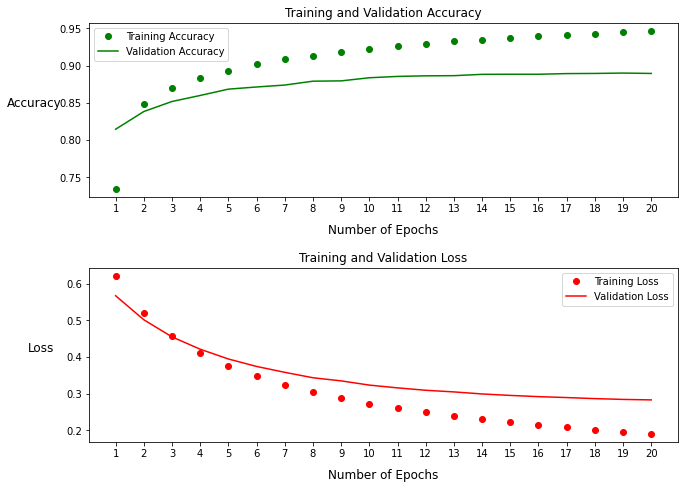

In [ ]:
baseline_mod_trained[0].summary()
plot_accuracy_and_loss(baseline_mod_trained[1].history, ind_var='Epochs', x_start=1, figsize=(10,7.5), x_tick_sep=1)


In [ ]:
print('Scores on Holdout Set:')
baseline_mod_trained[0].evaluate(x_test,y_test)
del baseline_mod_trained
gc.collect()

Scores on Holdout Set:
782/782 [==============================] - 2s 2ms/step - loss: 0.2991 - accuracy: 0.8827


9967

### <u>Step 6: Scaling up - Developing a model that overfits</u>

The baseline model has achieved an accuracy greater than the baseline, therefore the dataset is sufficiently informative to solve the problem. Although it is unclear whether the model is sufficiently powerful to model the problem. Hollet () suggests that the ideal model exists on the border between underfitting and overfitting. Finding a model that sits in this optimal area first involves developing a model that overfits. 
This is relatively simple and can be done by employing a combination of the following methods or individually : 

<ol>
<li>Increase number of layers in the network</li>
<li>Increase the size of the layers in the network</li>
<li>Train for more epochs </li>
</ol>

In [ ]:
#Callback Code:
class CustomCallBack(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        c=['\b|','\b/', '\b-', '\b\\']
        print(c[epoch % 4], end='')
    def on_epoch_end(self, epoch, logs=None):
        print('\b', end='')

def model_layer_loop(units:int, epochs:int, batch_size:int, verbose:int):
    tf.random.set_seed(2)
    from keras import models, layers
    
    one_layer = models.Sequential()
    one_layer.add(layers.Dense(1, activation = 'sigmoid', input_shape=(10000,)))
    one_layer.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])
    
    one_history = one_layer.fit(x_train_split, y_train_split, verbose=verbose, epochs=epochs,
                                batch_size=batch_size, validation_data=(x_validation, y_validation),
                                callbacks=[CustomCallBack()])

    two_layer = models.Sequential()
    two_layer.add(layers.Dense(units, activation = 'relu',input_shape=(10000,)))
    two_layer.add(layers.Dense(1, activation = 'sigmoid'))
    two_layer.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])
    
    two_history = two_layer.fit(x_train_split, y_train_split, verbose=verbose, epochs=epochs,
                                batch_size=batch_size, validation_data=(x_validation, y_validation),
                                callbacks=[CustomCallBack()])

    three_layer = models.Sequential()
    three_layer.add(layers.Dense(units, activation = 'relu',input_shape=(10000,)))
    three_layer.add(layers.Dense(units, activation = 'relu'))
    three_layer.add(layers.Dense(1, activation = 'sigmoid'))
    three_layer.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])
    
    three_history = three_layer.fit(x_train_split, y_train_split, verbose=verbose, epochs=epochs,
                                    batch_size=batch_size, validation_data=(x_validation, y_validation),
                                    callbacks=[CustomCallBack()])

    four_layer = models.Sequential()
    four_layer.add(layers.Dense(units, activation = 'relu',input_shape=(10000,)))
    four_layer.add(layers.Dense(units, activation = 'relu'))
    four_layer.add(layers.Dense(units, activation = 'relu'))
    four_layer.add(layers.Dense(1, activation = 'sigmoid'))
    four_layer.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])
    
    four_history = four_layer.fit(x_train_split, y_train_split, verbose=verbose, epochs=epochs,
                                  batch_size=batch_size, validation_data=(x_validation, y_validation),
                                  callbacks=[CustomCallBack()])
    
    list_of_models = [one_layer, two_layer, three_layer, four_layer]
    list_of_model_dicts = [one_history.history, two_history.history, three_history.history, four_history.history]
    
        
    return list_of_models, list_of_model_dicts

def plot_history(history:list):
    
    tf.random.set_seed(2)
    
    fig, axes = plt.subplots(2,1, figsize=(10,10), sharex=True)
    fig.tight_layout(pad=5)    
    
    #Accuracy Graphs 
    one_accuracy = history[0]['accuracy']
    two_accuracy = history[1]['accuracy']
    three_accuracy = history[2]['accuracy']
    four_accuracy = history[3]['accuracy']
    one_validation_acc = history[0]['val_accuracy']
    two_validation_acc = history[1]['val_accuracy']
    three_validation_acc = history[2]['val_accuracy']
    four_validation_acc = history[3]['val_accuracy']

    num_ind_var = [i for i in range(1,len(history[0]['accuracy'])+1)]

    axes[0].plot(num_ind_var, one_accuracy, 'go', label = 'TA - 1 Layer')
    axes[0].plot(num_ind_var, two_accuracy, 'bo', label = 'TA - 2 Layers')
    axes[0].plot(num_ind_var, three_accuracy, 'yo', label = 'TA - 3 Layers')
    axes[0].plot(num_ind_var, four_accuracy, 'ro', label = 'TA - 4 Layers')
    axes[0].plot(num_ind_var, one_validation_acc, 'g', label = 'VA - 1 Layer')
    axes[0].plot(num_ind_var, two_validation_acc, 'b', label = 'VA - 2 Layers')
    axes[0].plot(num_ind_var, three_validation_acc, 'y', label = 'VA - 3 Layers')
    axes[0].plot(num_ind_var, four_validation_acc, 'r', label = 'VA- 4 Layers')

    axes[0].set_title('Training and Validation Accuracy', size=14)
    axes[0].set_xlabel('Number of Epochs', size=12)
    axes[0].set_xticks(ticks=num_ind_var)
    axes[0].set_ylabel('Accuracy', rotation=0, labelpad=30, size=12)
    axes[0].legend(bbox_to_anchor=(1.2, .75), title = 'TA = Training Accuracy, VA = Validation Accuracy')
    
    #Loss Graphs 
    one_loss = history[0]['loss']
    two_loss = history[1]['loss']
    three_loss = history[2]['loss']
    four_loss = history[3]['loss']
    one_validation_loss = history[0]['val_loss']
    two_validation_loss = history[1]['val_loss']
    three_validation_loss = history[2]['val_loss']
    four_validation_loss = history[3]['val_loss']

    axes[1].plot(num_ind_var, one_loss, 'go', label = 'TL- 1 Layer')
    axes[1].plot(num_ind_var, two_loss, 'bo', label = 'TL - 2 Layers')
    axes[1].plot(num_ind_var, three_loss, 'yo', label = 'TL - 3 Layers')
    axes[1].plot(num_ind_var, four_loss, 'ro', label = 'TL - 4 Layers')
    axes[1].plot(num_ind_var, one_validation_loss, 'g', label = 'VL - 1 Layer')
    axes[1].plot(num_ind_var, two_validation_loss, 'b', label = 'VL - 2 Layers')
    axes[1].plot(num_ind_var, three_validation_loss, 'y', label = 'VL - 3 Layers')
    axes[1].plot(num_ind_var, four_validation_loss, 'r', label = 'VL - 4 Layers')

    axes[1].set_title('Training and Validation Loss',size=14)
    axes[1].set_xlabel('Number of Epochs', size=12)
    axes[1].set_xticks(ticks=num_ind_var)
    axes[1].set_ylabel('Loss', rotation=0, labelpad=(30), size=12)
    axes[1].legend(bbox_to_anchor=(1.2, .75), title = 'TL = Training Loss, VL = Validation Loss')
    
    plt.show()


#### Increasing the number of Layers, the size of layers and the number of epochs

Overfitting can be identified by plotting the training and validation loss curves for the different models. 

The validation loss decreases over time until a turning point is reached where the validation loss rises again. These turning points represent the beggining of overfitting. Overfitting indicates that the neural netowrk is modelling the training data too well to the extent that it will negatively impact the model's perforamnce unseen data.  

The graphs below illustrate that as the number of units per layer increases the beggining of overfitting occurs earlier when training the model. Similarly by training the model for a larger number of epochs increases the likelihood of overfitting.  



|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\

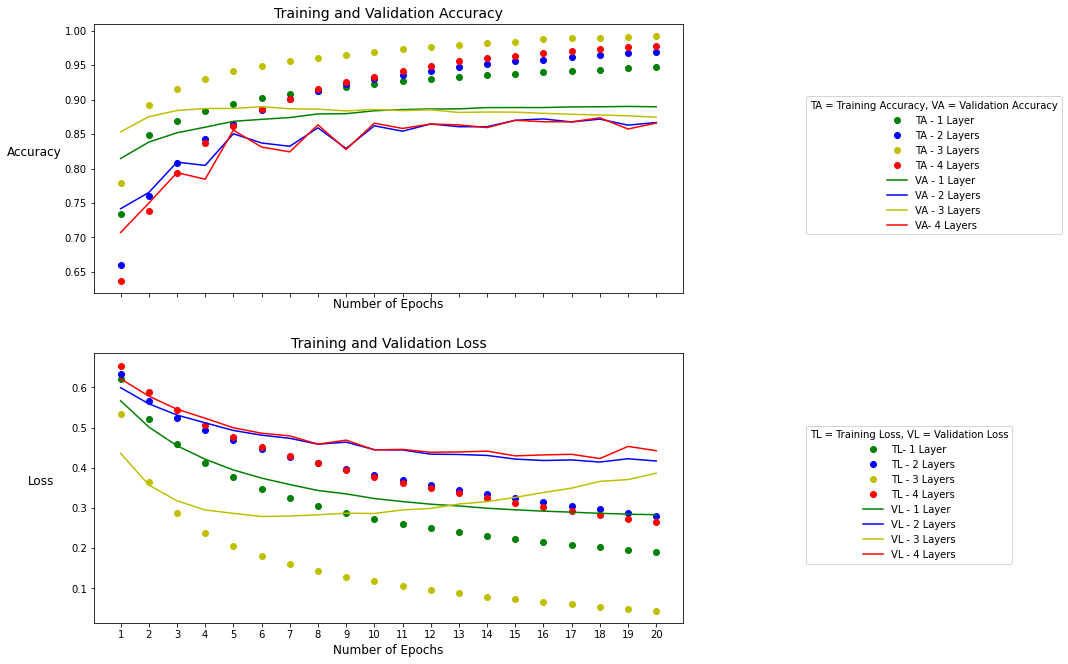

13282

In [ ]:
fin_history = model_layer_loop(units=2,epochs=20,batch_size=512, verbose=0)
plot_history(fin_history[1])
del fin_history
gc.collect()

|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\

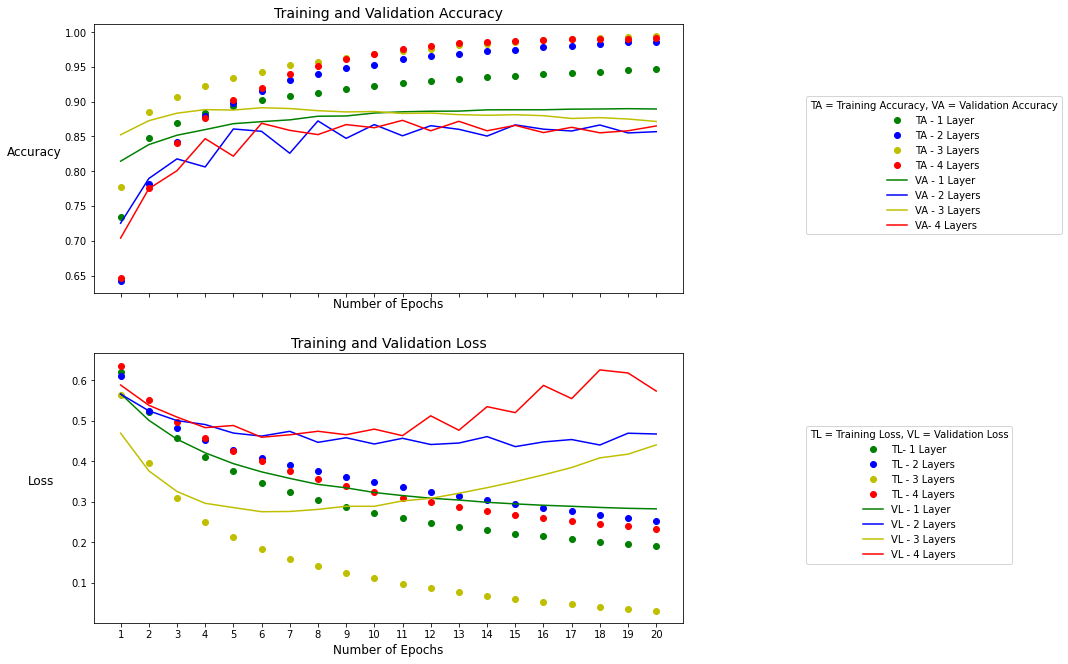

17557

In [ ]:
fin_history_2 = model_layer_loop(units=4,epochs=20,batch_size=512, verbose=0)
plot_history(fin_history_2[1])
del fin_history_2
gc.collect()

|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\

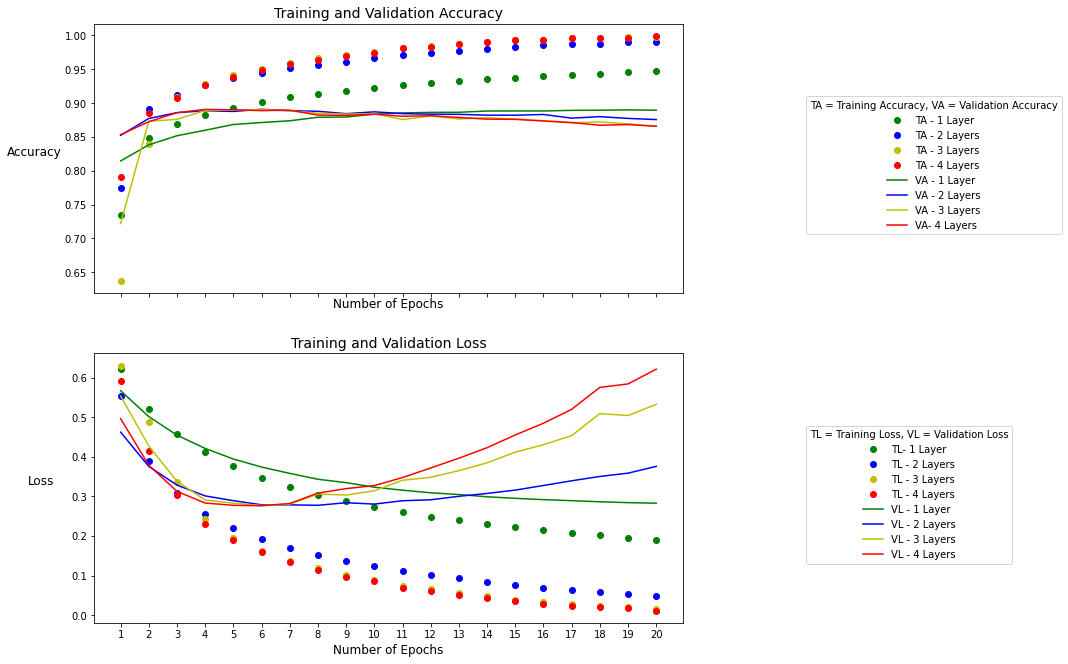

17630

In [ ]:
fin_history_3 = model_layer_loop(units=8,epochs=20,batch_size=512, verbose=0)
plot_history(fin_history_3[1])
del fin_history_3
gc.collect()

|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\

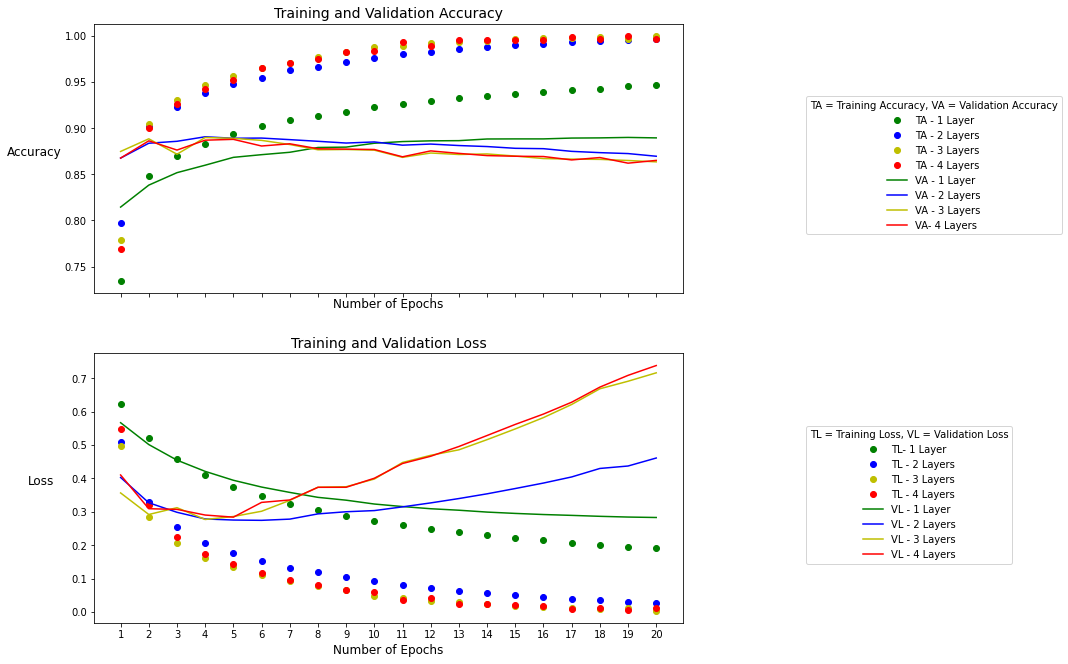

17444

In [ ]:
fin_history_4 = model_layer_loop(units=16,epochs=20,batch_size=512, verbose=0)
plot_history(fin_history_4[1])
del fin_history_4
gc.collect()

#### Model that overfits

Scores on Holdout Set:
782/782 [==============================] - 2s 2ms/step - loss: 0.3780 - accuracy: 0.8693


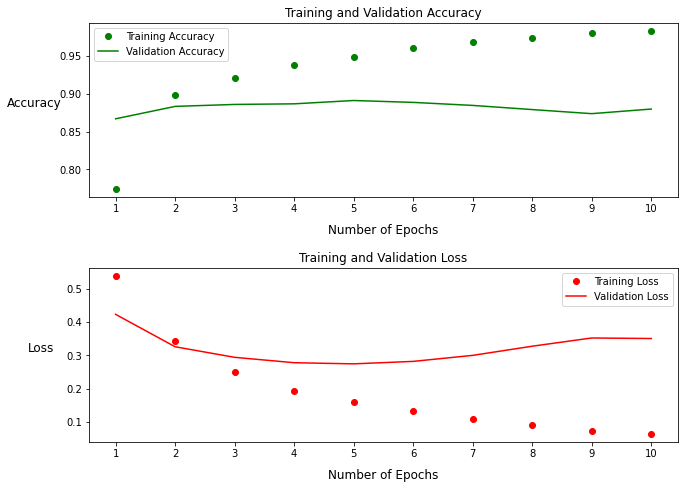

In [ ]:
overfit_model = create_model(num_of_layers=3, l1_units=16, mid_layer_units=16)
overfit_mod_trained = train_model(overfit_model,epochs=10, batch_size=512, verbose=0, validation=True)
overfit_mod_trained[1].history['Epochs'] = [i for i in range(1,len(overfit_mod_trained[1].history['loss'])+1)]
print('Scores on Holdout Set:')
overfit_mod_trained[0].evaluate(x_test,y_test)

plot_accuracy_and_loss(overfit_mod_trained[1].history, ind_var='Epochs', x_start=1, figsize=(10,7.5),x_tick_sep=1)
# del baseline_mod_trained
# gc.collect()

### <u>Step 7: Regularising your model and tuning your hyperparameters</u>

Typically the best solution to overfitting is to find and use more training data, however data is often limited. Alternatively other solutions involve using drop-out, weight regularisation or reduce the size of the network. The process of tuning hyperparamters involved repeatedly modifying the model, training it and evaluating on validation data to develop the best model possible. Tuning model hyperparameters is a crucial step within the universal workflow to find the optimal combination of hyperparameters to minimise the loss function. Ultimately leading to an improved model and improved results. 


#### Code for Tuning Hyperparameters

In [ ]:
early_val_loss_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, 
                                                           patience=0, verbose=0,mode='min')
def create_param_grid(param_dict:dict):
    param_grid = []
    parameters = list(param_dict.keys())
    for i in range(len(param_dict[parameters[0]])):
        for j in range(len(param_dict[parameters[1]])):
            for x in range(len(param_dict[parameters[2]])):
                param_grid.append([param_dict[parameters[0]][i],param_dict[parameters[1]][j],param_dict[parameters[2]][x]])
    return param_grid

def build_model(units:int, dropout:bool, learning_rate:int):
    tf.random.set_seed(2)
    model = models.Sequential()
    
    model.add(layers.Dense(units, activation = 'relu',input_shape=(10000,)))
    
    if dropout == True:
        model.add(layers.Dropout(0.4))
    
    model.add(layers.Dense(units, activation = 'relu', ))
    if dropout == True:
        model.add(layers.Dropout(0.4))
    
    model.add(layers.Dense(1, activation = 'sigmoid', ))
    
    rms_propr_optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)                           
    model.compile(optimizer=rms_propr_optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])
    
    return model

def train_model_v2(model, verbose:int, epochs:int, batch_size:int, callback):
    tf.random.set_seed(2)
    model.fit(x_train_split, y_train_split, verbose=verbose, epochs=epochs,
              batch_size=batch_size,callbacks=callback,
              validation_data = (x_validation, y_validation))
    
    results = [model.history.history['val_loss'], model.history.history['val_accuracy'][-1]]
    
    return results
    

In [ ]:
def hypertuning(param_dict:dict, verbose:int, epochs:int):
    
    tf.random.set_seed(2)
    param_grid = create_param_grid(param_dict)
    
    tuning_results = {}

    for i in range(len(param_grid)):
        model = build_model(units=param_grid[i][0], learning_rate=param_grid[i][1],
                    dropout=param_grid[i][2])
        # print('Model Built :{}'.format(param_grid[i]))

        results = train_model_v2(model, verbose=verbose, epochs=20, batch_size=512,
                             callback=early_val_loss_callback)
        
        tuning_results['-'.join(str(e)for e in param_grid[i])] = results[1]
        print('Results Obtained:{}'.format(param_grid[i]))
        print('\n')
        del model
        del results
    
    return tuning_results

#### Tuning Hyperparameters and Regularising

The selected hyperparameters for tuning where stored in a dictionary and then every combination of the chosen parameters was evaluated on the validation data, and the results were stored. An early callback was used to prevent the models overfitting.

In [ ]:
parameters_to_tune = { 
    'Units': [16,18,20,22],
    'Learning Rate' : [0.001,0.002,0.003,0.004,0.005,0.006, 0.007, 0.008, 0.009,0.01],
    'Dropout' : [True, False]  
}

tuning_results = hypertuning(parameters_to_tune, verbose=0, epochs=20)

Results Obtained:[16, 0.001, True]


Results Obtained:[16, 0.001, False]


Results Obtained:[16, 0.002, True]


Results Obtained:[16, 0.002, False]


Results Obtained:[16, 0.003, True]


Results Obtained:[16, 0.003, False]


Results Obtained:[16, 0.004, True]


Results Obtained:[16, 0.004, False]


Results Obtained:[16, 0.005, True]


Results Obtained:[16, 0.005, False]


Results Obtained:[16, 0.006, True]


Results Obtained:[16, 0.006, False]


Results Obtained:[16, 0.007, True]


Results Obtained:[16, 0.007, False]


Results Obtained:[16, 0.008, True]


Results Obtained:[16, 0.008, False]


Results Obtained:[16, 0.009, True]


Results Obtained:[16, 0.009, False]


Results Obtained:[16, 0.01, True]


Results Obtained:[16, 0.01, False]


Results Obtained:[18, 0.001, True]


Results Obtained:[18, 0.001, False]


Results Obtained:[18, 0.002, True]


Results Obtained:[18, 0.002, False]


Results Obtained:[18, 0.003, True]


Results Obtained:[18, 0.003, False]


Results Obtained:[18, 0.004

In [ ]:
best_model = max(tuning_results, key=tuning_results.get)
print('Best Model: Units per Layer = {}, Learning Rate = {}, Dropout = {}'.format(best_model.split('-')[0], best_model.split('-')[1],best_model.split('-')[2]))
print('Validation Accuracy = {}'.format(tuning_results[best_model]))

Best Model: Units per Layer = 18, Learning Rate = 0.004, Dropout = False
Validation Accuracy = 0.8916000127792358


#### Finding Optimal Epochs for the best model

Can see from the turning point on the graph below that the optimal epochs for this model is 2, after this point the model starts to overfit. 

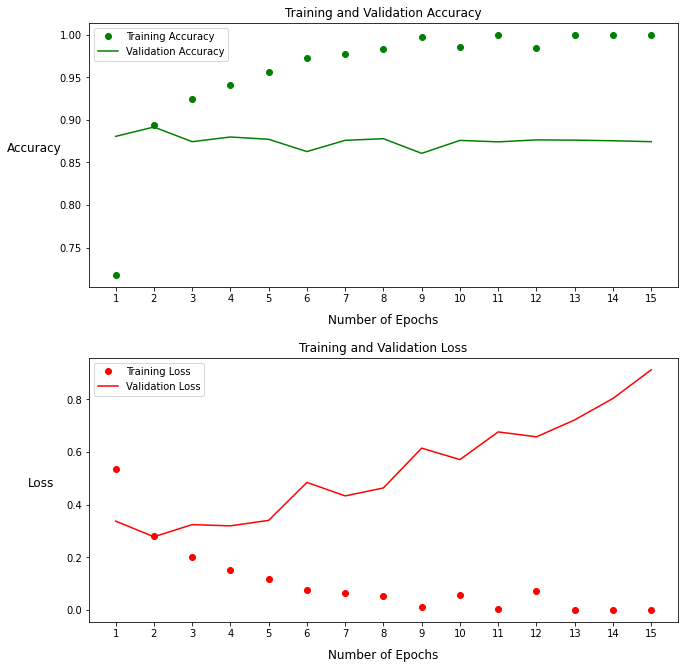

In [ ]:
best_model = build_model(units=18, learning_rate=0.004, dropout=False)
best_model_trained = train_model(best_model, epochs=15, verbose=0, batch_size=512, validation=True)

best_model_trained[1].history['Epochs'] = [i for i in range(1,len(best_model_trained[1].history['loss'])+1)]
plot_accuracy_and_loss(best_model_trained[1].history, ind_var='Epochs', x_start=1, x_tick_sep=1, figsize=(10,10))

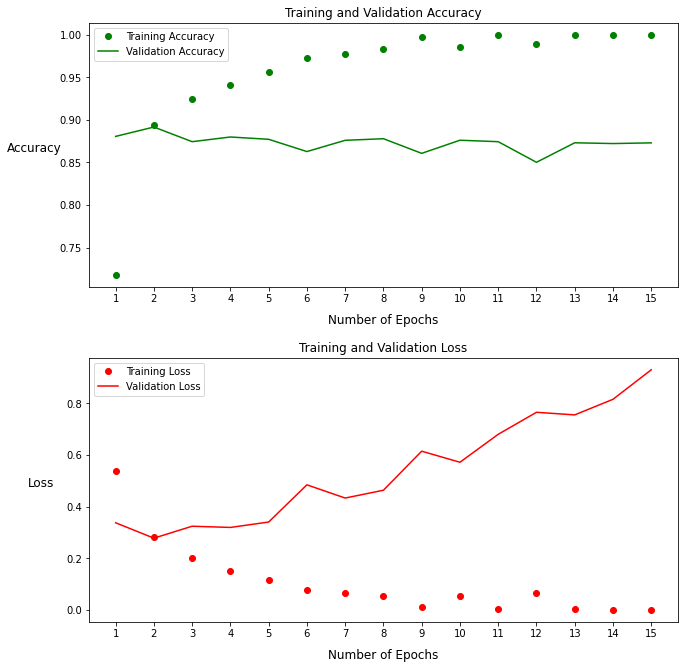

In [ ]:
best_model = build_model(units=18, learning_rate=0.004, dropout=False)
best_model_trained = train_model(best_model, epochs=15, verbose=0, batch_size=512, validation=True)
best_model_trained[1].history['Epochs'] = [i for i in range(1,len(best_model_trained[1].history['loss'])+1)]
plot_accuracy_and_loss(best_model_trained[1].history, ind_var='Epochs', x_start=1, x_tick_sep=1, figsize=(10,10))

#### Building and Training Final Model using all training data.

In [ ]:
final_model = build_model(units=18, learning_rate=0.004, dropout=False)
final_model.fit(x_train, y_train, verbose=0, epochs=2,
                                      batch_size=512,callbacks=[CustomCallBack()])
results = final_model.evaluate(x_test, y_test)

print('Final Model Accuracy = {}%'.format(round(results[1],3)*100))

782/782 [==============================] - 2s 2ms/step - loss: 0.3014 - accuracy: 0.8789
Final Model Accuracy = 87.9%


In [ ]:
def conf_matrix(y_test, y_predict):
    dim = len(set(y_predict))
    d_m = np.zeros((dim,dim), dtype = np.int)
    
    for i in range(len(y_predict)):
        d_m[y_test[i], y_predict[i]] += 1
    return d_m

def plot_conf_matrix(c_m):
    fig, ax = plt.subplots()
    matrix = ax.matshow(c_m, cmap='Blues')
    fig.colorbar(matrix)
    
    ax.set_xlabel('Predicted Classes', labelpad=10)
    ax.set_ylabel('Actual Classes',rotation=0, labelpad= 50)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    
    for (x,y),z in np.ndenumerate(c_m):   
        ax.text(y,x,z)
    
    return matrix

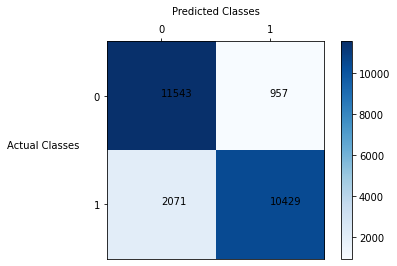

In [ ]:
y_pred = final_model.predict(x_test)
rounded_y_pred = [round(y_pred[i][0]) for i in range(len(y_pred))] 
y_test_new = [int(i) for i in y_test]
plot_conf_matrix(conf_matrix(y_test_new,rounded_y_pred))

# <u>Results </u>
The results from hyperparameter tuning indicate the best model relating to model accuracy is develoepd using the following parameters; 3 Layers, 18 Units per layer, learning rate of 0.004. 

The model incorrectly predicted 7.6% of negative reviews as positive and incorrectly predicted 16.5% of positive reviews as negative. The overall model acccuracy was 87.9%. These results are analagous with other attempt to create a neural network to classify IMDB reviews as positive or negative(Binary Classification of IMDB Movie Reviews, 2022; Classifying movie reviews: a binary classification example, 2022).  

# <u>Conclusion </u>

In conclusion, using the universal machine learning workflow put forward by Chollet(2021) facilitated the development of an accurate Neural Network that could classify IMDB reviews as positive or negative.There are several considerations that need to be made when creating a machine learning model which can differ based on the dataset being used, the machine learning task amongst many other factors. By following a machine learning workflow this helps simplify the development process by providing a clear structure of the necessary steps required to implement a fucntional model that obtains the bst results possible. Moreover, following the workflow helps in avoiding the common pitfalls that can occur. 

# <u>References </u>

Chollet, F., 2021. Deep learning with Python. Simon and Schuster.

Medium. 2022. Binary Classification of IMDB Movie Reviews. [online] Available at: <https://towardsdatascience.com/binary-classification-of-imdb-movie-reviews-648342bc70dd> [Accessed 3 January 2022].

Vsokolov.org. 2022. Classifying movie reviews: a binary classification example. [online] Available at: <https://vsokolov.org/courses/41000/notes/nlp-imdb.html> [Accessed 3 January 2022].